In [1]:
# required imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#loading data

df = pd.read_csv('D:/google data analytics/Project/Linear reg datasets/adm_data.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## EDA 

### Viualization

<AxesSubplot:>

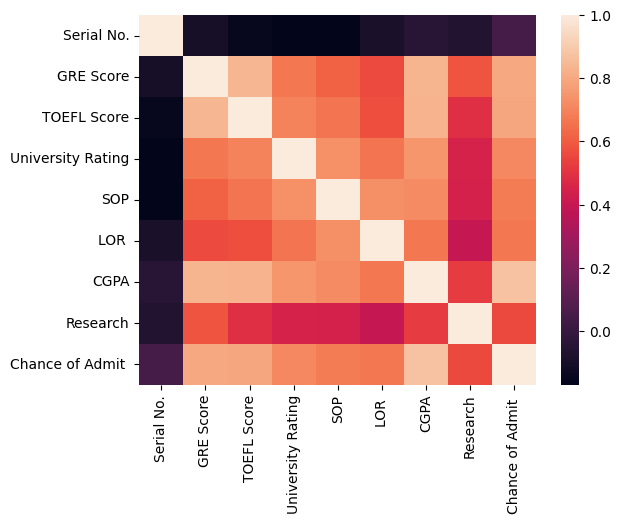

In [6]:
df.corr()
sns.heatmap(df.corr(), linecolor = 'white')

CGPA is highly correlated where as Research is the least

## GRE SCORE Distribution

<AxesSubplot:xlabel='GRE Score'>

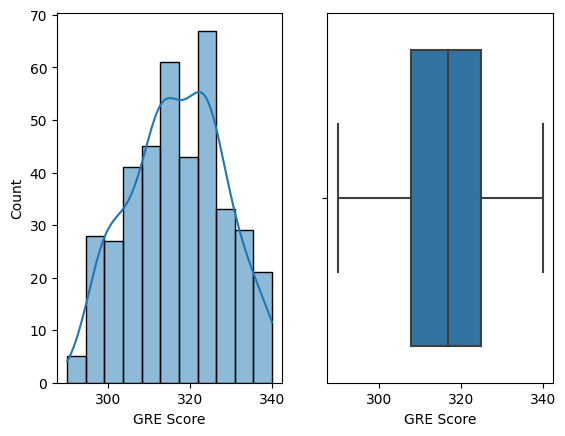

In [7]:
plt.subplot(1,2,1)
sns.histplot(x = 'GRE Score', data = df, lw = 1, kde = True)
plt.subplot(1,2,2)
sns.boxplot(x = 'GRE Score', data = df)

We see normal distribution and no visible outliers.

## TOEFL Score

<AxesSubplot:xlabel='TOEFL Score'>

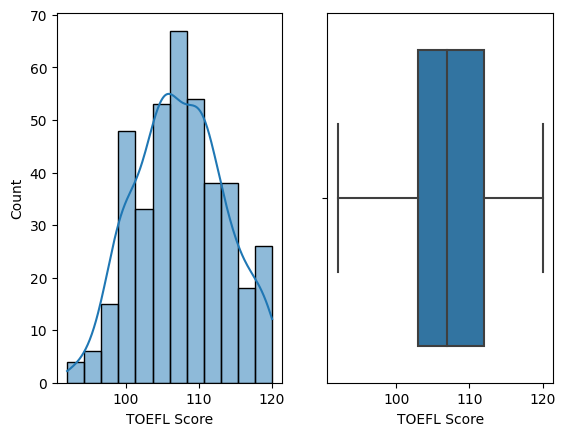

In [8]:
plt.subplot(1,2,1)
sns.histplot(x = 'TOEFL Score', data = df, lw = 1, kde = True)
plt.subplot(1,2,2)
sns.boxplot(x = 'TOEFL Score', data = df)

TOEFL is similar to GRE

## Count of University Rating

<AxesSubplot:xlabel='University Rating', ylabel='count'>

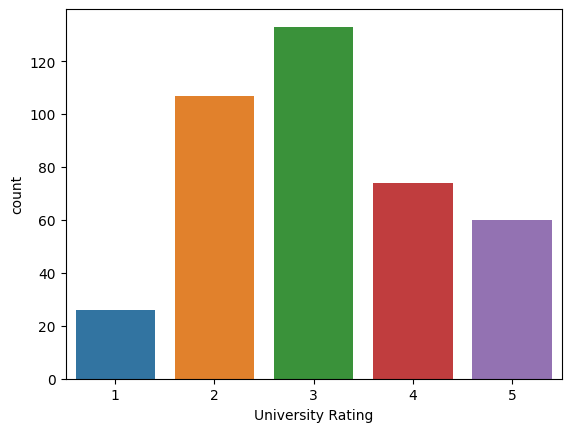

In [9]:
sns.countplot(x= 'University Rating', data = df)

## Count of Number of Candidates who have completed a research 

<AxesSubplot:xlabel='Research', ylabel='count'>

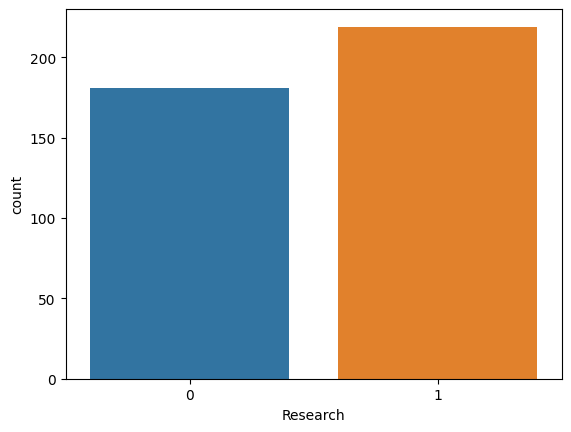

In [10]:
sns.countplot(x = 'Research', data = df)

## Countplot for Research and University Rating 

<AxesSubplot:xlabel='University Rating', ylabel='count'>

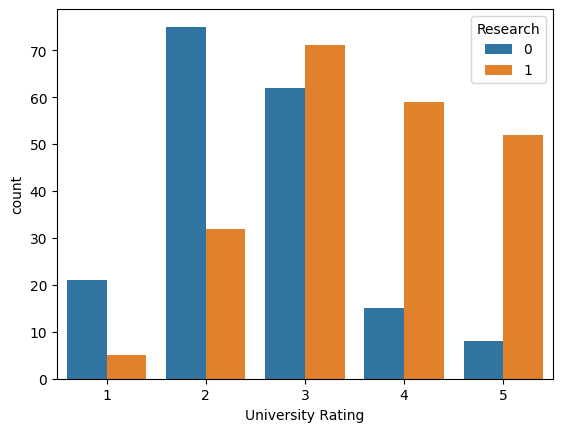

In [11]:
sns.countplot(x = 'University Rating', hue = 'Research', data = df)

From this we can see that HIghly ranked universities prefer candidates who have a completed and have a reearch paper under thier sleeve.

## Predictive Analysis

In [12]:
#importing required libraries 

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols

In [13]:
# splitting data
df1 = df.drop(['Serial No.'], axis = 1)
X = df1.drop(['Chance of Admit '],axis = 1)
y = df1['Chance of Admit ']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

## Linear Regresion

In [14]:
lr = LinearRegression()

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

## Model Evaluation

In [15]:
print('Score for training', round(lr.score(X_train,y_train),4))
print('Score for testing', round(lr.score(X_test,y_test),4))
print('Mean Abolute Error', round(metrics.mean_absolute_error(y_test,lr_pred),4))
print('Mean Squared Error', round(metrics.mean_squared_error(y_test,lr_pred),4))
print('Root Mean squared Error', round(np.sqrt(metrics.mean_squared_error(y_test,lr_pred)),4))
print('R2 Score', round(metrics.r2_score(y_test,lr_pred),4))

Score for training 0.7952
Score for testing 0.8212
Mean Abolute Error 0.048
Mean Squared Error 0.0046
Root Mean squared Error 0.0679
R2 Score 0.8212


<AxesSubplot:xlabel='Chance of Admit '>

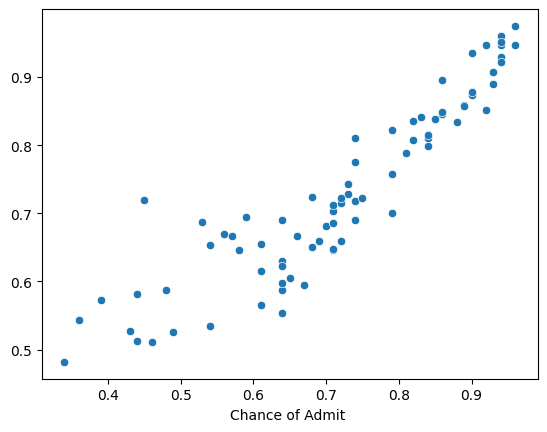

In [16]:
# plotting the actual and predicted values 
sns.scatterplot(x = y_test,y = lr_pred)



## Decision Tree

In [17]:
dt = DecisionTreeRegressor()

dt.fit(X_train,y_train)

dt_pred = dt.predict(X_test)

## Evaluation

In [18]:
print('Score for training', round(dt.score(X_train,y_train),4))
print('Score for testing', round(dt.score(X_test,y_test),4))
print('Mean Abolute Error', round(metrics.mean_absolute_error(y_test,dt_pred),4))
print('Mean Squared Error', round(metrics.mean_squared_error(y_test,dt_pred),4))
print('Root Mean squared Error', round(np.sqrt(metrics.mean_squared_error(y_test,dt_pred)),4))
print('R2 Score', round(metrics.r2_score(y_test,dt_pred),4))

Score for training 1.0
Score for testing 0.6672
Mean Abolute Error 0.0632
Mean Squared Error 0.0086
Root Mean squared Error 0.0927
R2 Score 0.6672


## Random Forest 

In [19]:
rf = RandomForestRegressor(n_estimators = 200)

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

## Evaluation 

In [20]:
print('Score for training', round(rf.score(X_train,y_train),4))
print('Score for testing', round(rf.score(X_test,y_test),4))
print('Mean Abolute Error', round(metrics.mean_absolute_error(y_test,rf_pred),4))
print('Mean Squared Error', round(metrics.mean_squared_error(y_test,rf_pred),4))
print('Root Mean squared Error', round(np.sqrt(metrics.mean_squared_error(y_test,rf_pred)),4))
print('R2 Score', round(metrics.r2_score(y_test,rf_pred),4))

Score for training 0.9635
Score for testing 0.8069
Mean Abolute Error 0.0498
Mean Squared Error 0.005
Root Mean squared Error 0.0706
R2 Score 0.8069


## KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# assuming some random K value.

KN = KNeighborsRegressor(n_neighbors=5)

KN.fit(X_train, y_train)

KN_pred = KN.predict(X_test)

## Evaluation

In [22]:
print('Score for training', round(KN.score(X_train,y_train),4))
print('Score for testing', round(KN.score(X_test,y_test),4))
print('Mean Abolute Error', round(metrics.mean_absolute_error(y_test,KN_pred),4))
print('Mean Squared Error', round(metrics.mean_squared_error(y_test,KN_pred),4))
print('Root Mean squared Error', round(np.sqrt(metrics.mean_squared_error(y_test,KN_pred)),4))
print('R2 Score', round(metrics.r2_score(y_test,KN_pred),4))

Score for training 0.7936
Score for testing 0.7121
Mean Abolute Error 0.0618
Mean Squared Error 0.0074
Root Mean squared Error 0.0862
R2 Score 0.7121


<AxesSubplot:xlabel='Chance of Admit '>

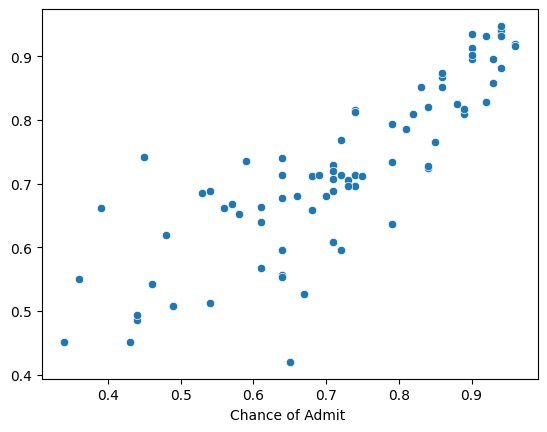

In [23]:
#plot output

sns.scatterplot(x = y_test, y = KN_pred)

## XGBOOST

In [26]:
import sys
!{sys.executable} -m pip install xgboost

     -------------------------------------- 125.4/125.4 MB 3.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: C:\Users\Admin\Anaconda3\python.exe -m pip install --upgrade pip


In [27]:
import xgboost as xg

In [34]:
xgr = xg.XGBRegressor(objective = 'reg:linear', n_estimators = 200)
xgr.fit(X_train,y_train)

xgr_pred = xgr.predict(X_test)


[06:17:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
print('Score for training', round(xgr.score(X_train,y_train),4))
print('Score for testing', round(xgr.score(X_test,y_test),4))
print('Mean Abolute Error', round(metrics.mean_absolute_error(y_test,xgr_pred),4))
print('Mean Squared Error', round(metrics.mean_squared_error(y_test,xgr_pred),4))
print('Root Mean squared Error', round(np.sqrt(metrics.mean_squared_error(y_test,xgr_pred)),4))
print('R2 Score', round(metrics.r2_score(y_test,xgr_pred),4))

Score for training 0.9998
Score for testing 0.7748
Mean Abolute Error 0.0539
Mean Squared Error 0.0058
Root Mean squared Error 0.0763
R2 Score 0.7748


<AxesSubplot:xlabel='Chance of Admit '>

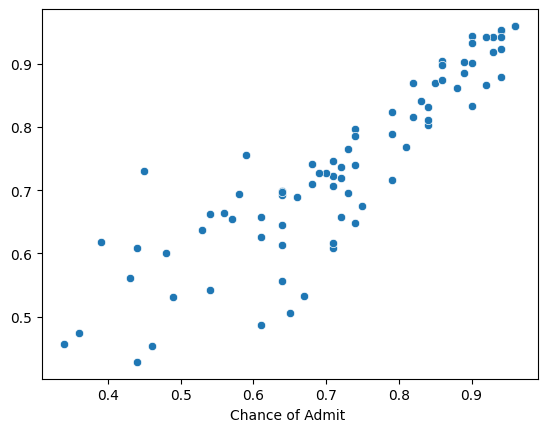

In [36]:
# plot 

sns.scatterplot(x = y_test, y = xgr_pred)